<a href="https://colab.research.google.com/github/antndlcrx/oss_2024/blob/main/tutorials/oss_llms_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://cdn.githubraw.com/antndlcrx/oss_2024/main/images/dpir_oss.png?raw=true:,  width=70" alt="My Image" width=700>

# Introduction to LLMs

This is an overview tutorial on Large Language Models (LLMs) for social sciences. It gives a basic introduction to main concepts around LLMs and aims to communicate main intuitions behind model training and usage.

It covers:
- A Primer on Embeddings
- A Primer on Transformers and Language Modelling
- A Note on Deep Learning
- A Note on Model Biases
- Huggingface hub
- Practical Research Example

And offers links to amazing resources for further learning and exploration!




# The Issue with Count-Based Methods

Count-based methods for analysing text data often rely on the frequency of each word in the text to determine its importance or to derive the text's meaning.

This approach can be problematic because it ignores the context and order in which words appear, potentially leading to misinterpretation of the text's true meaning.

In [4]:
from collections import Counter

sentence1 = "Dog bites man"
sentence2 = "Man bites dog"

count1 = Counter(sentence1.split())
count2 = Counter(sentence2.split())

count1, count2

(Counter({'Dog': 1, 'bites': 1, 'man': 1}),
 Counter({'Man': 1, 'bites': 1, 'dog': 1}))

# A (very very short) Primer on Embeddings

**Word embeddings are vector representation of words**. They are trained to capture the *meaning* of words.

## But what is *meaning*?

In linguistics, the meaning of a word encompasses its definitions, connotations, and the relationships it holds with other words. For humans, understanding the meaning of a word involves not just knowing its dictionary definition but also understanding the contexts in which it can be used and how it combines with other words to form phrases and sentences. For a computer, capturing this information in a numerical form is a significant challenge.

Initially, computers struggled with the nuances of human language because they treated words as discrete, isolated objects without understanding the relationships between them. The breakthrough came with the realisation that you could teach a computer about the meaning of words by analysing the contexts in which they appear. This approach is grounded in a principle called **distributional semantics**.

## Distributional semantics!

The core idea of distributional semantics is that a word's meaning can be understood by the company it keeps. In other words, **words that are used and occur in similar contexts tend to have similar meanings**. This is the famous linguistic hypothesis: "You shall know a word by the company it keeps" (Firth, J.R. 1957).

## Word Embeddings

Word embeddings are trained by using algorithms that* adjust word vectors based on their co-occurrence in large text corpora, ensuring that words appearing in similar contexts are positioned closely in the vector space*. This process effectively captures the linguistic relationships between words in a multidimensional geometric space. The resulting models can then interpret language with a sophistication that closely mirrors human understanding of word meanings and relationships**.

*Check out this [Grand et al. 2022](https://www.nature.com/articles/s41562-022-01316-8) paper "Semantic projection recovers rich human knowledge of multiple object features from word embeddings".

## Must See Resource: NLP Course for You
For an in-depth walk-through of embeddings, particularly Word2Vec and GloVe algorithms, check out this [amazing material by Lena Voita](https://lena-voita.github.io/nlp_course/word_embeddings.html).  



## Explore Embeddings

In [1]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import gensim.downloader as api

import plotly.graph_objects as go
import matplotlib.pyplot as plt

[Gensim](https://radimrehurek.com/gensim/index.html): library for training of vector embeddings – Python or otherwise.

In [2]:
# this code can take about a minute to run
model = api.load('glove-wiki-gigaword-100')

[==================================================] 100.0% 128.1/128.1MB downloaded


In [3]:
top_words = model.index_to_key[:1000]
embeddings = np.asarray([model.get_vector(word) for word in top_words])

`index_to_key` is an attribute of the model object that stores all the vocabulary keys (words) of the model, typically sorted by frequency (most to least frequent). By slicing `[:1000]`, it selects the first 1000 words in this list, which typically correspond to the most frequent words in the corpus.

`embeddings = np.asarray([model.get_vector(word) for word in top_words])`: This line creates an array of word embeddings for the selected top words. It iterates over each word in `top_words`, retrieves its embedding vector using `model.get_vector(word)`, and stores it in the `embeddings` array.

`np.asarray()` converts the list of embedding vectors into a NumPy array for further processing or analysis.

In [5]:
#@title Embeddings Visualised 2D

tsne = TSNE(n_components=2, random_state=0)
reduced_embeddings_2d = tsne.fit_transform(embeddings)

fig = go.Figure(data=[go.Scatter(
    x=reduced_embeddings_2d[:, 0],  # t-SNE dimension 1
    y=reduced_embeddings_2d[:, 1],  # t-SNE dimension 2
    mode='markers+text',
    text=top_words,
    textposition="bottom center"
)])

fig.update_layout(
    title='2D t-SNE Visualization of the Top 1000 Most Frequent Words',
    xaxis_title='t-SNE Dimension 1',
    yaxis_title='t-SNE Dimension 2'
)

fig.show()

In [15]:
#@title Embeddings Visualised 3D
# import plotly.graph_objects as go

tsne = TSNE(n_components=3, random_state=0)
reduced_embeddings_3d = tsne.fit_transform(embeddings)

fig = go.Figure(data=[go.Scatter3d(
    x=reduced_embeddings_3d[:, 0],  # t-SNE dimension 1
    y=reduced_embeddings_3d[:, 1],  # t-SNE dimension 2
    z=reduced_embeddings_3d[:, 2],  # t-SNE dimension 3
    mode='markers+text',
    text=top_words,
    textposition="bottom center",
    marker=dict(
        size=5,
        opacity=0.8,
    )
)])

fig.update_layout(
    title='3D t-SNE Visualization of the Top 1000 Most Frequent Words',
    scene=dict(
        xaxis_title='t-SNE Dimension 1',
        yaxis_title='t-SNE Dimension 2',
        zaxis_title='t-SNE Dimension 3'
    )
)

fig.show()

One of the most interesting properties of word embeddings is their ability to capture meaningful relationships between words in a way that can be manipulated algebraically. The famous example, "woman + king - man = queen", illustrates this beautifully:

By adding "woman" and subtracting "man" from "king", we're essentially transferring the gender aspect from "man" to "woman", while keeping the regal aspect intact.

The resulting vector from "woman + king - man" should ideally land close to the vector for "queen" in the embedding space, if the embeddings are well-trained. This is because "queen" shares the 'regality' with "king" and the 'femininity' with "woman".

In [ ]:
def find_analogy(positive, negative):
    """
    This function shows you what word relates to others in a special way

    For example, if you say, "What is to woman as king is to man?" this function tries to find the answer.

    Input: two lists of words:
    - positive: These are the words you want to add or compare to. For example, ['woman', 'king'].
    - negative: These are the words you want to subtract or remove from the comparison. For example, ['man'].

    If you don't put any words in the lists, the function will stop and tell you that it needs at least one word in each list.
    """
    if not positive or not negative:
        raise ValueError("Please make sure both lists have at least one word in them.")


    result = model.most_similar(positive=positive, negative=negative, topn=1)
    word, similarity = result[0]
    print(f"{' + '.join(positive)} - {' + '.join(negative)} = {word} (similarity score: {similarity:.2f})")

# Example use
positive_words = ['woman', 'king']
negative_words = ['man']
find_analogy(positive_words, negative_words)


woman + king - man = queen (similarity score: 0.77)


In [ ]:
# paris + germany - france
pos = ['paris', 'germany']
neg = ['france']

find_analogy(pos, neg)

paris + germany - france = berlin (similarity score: 0.88)


In [ ]:
# sushi + germany - japan
pos = ['sushi', 'germany']
neg = ['japan']

find_analogy(pos, neg)

sushi + germany - japan = gourmet (similarity score: 0.58)


Caution!: Embeddings can encode biases. Check out the paper by [Bolukbasi et al. 2016](https://proceedings.neurips.cc/paper_files/paper/2016/file/a486cd07e4ac3d270571622f4f316ec5-Paper.pdf)

In [ ]:
# woman + doctor - man
pos = ['woman', 'doctor']
neg = ['man']

find_analogy(pos, neg)

woman + doctor - man = nurse (similarity score: 0.77)


In [ ]:
# try yourself! #

pos = []
neg = []

find_analogy(pos, neg)

What other observations did you make?

# Language Models

**Word embeddings** are a great improvement over count based models but the **meanings they encode are static**.



Unlike static models, **Language models**, particularly those utilising transformer architecture, **generate representations for words that vary depending on the words around them**.

This means that in the sentence "*I set by the river bank watching the water flow*," and "*I need to deposit money into the bank*," the representation for "bank" would be different in each context.

## How do they do that?

- **Self-Attention Mechanism**: At the heart of the transformer architecture is the self-attention mechanism, which *allows the model to weigh the influence of different words within a sentence*. For each word, the transformer models all other words to determine which ones should be focused on (attended to) when understanding the current word. This results in a weighted representation that reflects not just the individual word's meaning but its meaning influenced by its context.

- **Layered Structure**: Transformers process input data through multiple layers of attention and transformation, *allowing them to capture complex relationships between words in a sentence*. Each layer can learn different aspects of language, such as syntax and semantics, making the model increasingly sophisticated at understanding language nuances*.


*This is a simplification.

## What is the Learning Objective?

A language modeling objective is a fundamental task in natural language processing (NLP) where the goal is to predict the next word in a sequence given the words that precede it.

### Language Modeling Objective

In **language modeling**, the model is trained to estimate **the probability distribution of a sequence of words in a language**. This is often achieved by maximising the likelihood of a sequence of words appearing in the training data. The objective is to maximise the joint probability of a sequence of words, which is typically decomposed into conditional probabilities using the chain rule of probability.

#### Mathematical Description

The joint probability of a word sequence $( w_1, w_2, \ldots, w_N )$ can be expressed using the chain rule as follows:

$$
P(w_1, w_2, \ldots, w_N) = P(w_1) P(w_2 | w_1) P(w_3 | w_1, w_2) \ldots P(w_N | w_1, w_2, \ldots, w_{N-1})
$$

In practice, each word $ w_n $ is predicted based on the words that came before it. The language model learns to predict the probability $ P(w_n | w_1, w_2, \ldots, w_{n-1}) $ for all possible $n $. The objective of training a language model is to maximise the likelihood of this probability across a given corpus, typically done by minimising the negative log-likelihood:

$$
\text{Minimize: } -\log P(w_1, w_2, \ldots, w_N) = -\sum_{n=1}^N \log P(w_n | w_1, w_2, \ldots, w_{n-1})
$$


### How Language Models Learn

During training:
- The model is given a sequence of words and is tasked with predicting the next word.
- It adjusts its internal parameters (weights in a neural network) to increase the probability assigned to the actual next word in the sequence.

For more: [Language Modelling NLP Course for You](https://lena-voita.github.io/nlp_course/language_modeling.html)

#### Masked Language Modeling (MLM)
(basically, a note on BERT and friends..)

A **different language modelling objective is to randomly mask some of the words in a sentence and learn to predict them based on the context provided by the non-masked words surrounding them**. This approach allows the model to integrate both left and right context, which helps it understand language.

The MLM objective can be mathematically represented as follows:

$$
\text{Maximize: } \log P(w_i | w_1, \ldots, w_{i-1}, \text{mask}, w_{i+1}, \ldots, w_N)
$$

Here, $w_i$  is the masked word, and the model uses both the preceding and succeeding context to predict its value.

#### Next Sentence Prediction (NSP)

Alongside MLM, BERT-like models also train using an objective called **Next Sentence Prediction**. In NSP, the model is given pairs of sentences and learns to *predict whether the second sentence is the actual subsequent sentence in the original document*. This task helps the model capture relationships between consecutive sentences, which is beneficial for tasks like question answering and natural language inference.



In [7]:
#@title A Simple Illustration of the Language Modelling Objective

import random

def unidirectional_training_sequence(sentence):
    words = sentence.split()
    print("Unidirectional Model Training Sequence:")
    for i in range(len(words)):
        input_sequence = ' '.join(words[:i])
        target_word = words[i]
        print(f"Input: '{input_sequence}', Target: '{target_word}'")

def bidirectional_masked_sequence(sentence):
    words = sentence.split()
    print("\nBidirectional Model Training Sequence (Masked):")
    for _ in range(len(words)):
        masked_sentence = words[:]
        # Randomly select an index to mask
        random_index = random.randint(0, len(words) - 1)
        masked_sentence[random_index] = '[MASK]'
        input_sequence = ' '.join(masked_sentence)
        target_word = words[random_index]
        print(f"Masked: '{input_sequence}', Target: '{target_word}'")

sentence = "I sat by the river bank watching the water flow"

unidirectional_training_sequence(sentence)
bidirectional_masked_sequence(sentence)



Unidirectional Model Training Sequence:
Input: '', Target: 'I'
Input: 'I', Target: 'sat'
Input: 'I sat', Target: 'by'
Input: 'I sat by', Target: 'the'
Input: 'I sat by the', Target: 'river'
Input: 'I sat by the river', Target: 'bank'
Input: 'I sat by the river bank', Target: 'watching'
Input: 'I sat by the river bank watching', Target: 'the'
Input: 'I sat by the river bank watching the', Target: 'water'
Input: 'I sat by the river bank watching the water', Target: 'flow'

Bidirectional Model Training Sequence (Masked):
Masked: '[MASK] sat by the river bank watching the water flow', Target: 'I'
Masked: 'I sat by the river bank watching the water [MASK]', Target: 'flow'
Masked: 'I sat by the river bank [MASK] the water flow', Target: 'watching'
Masked: 'I sat by the river bank watching the water [MASK]', Target: 'flow'
Masked: 'I sat by the river [MASK] watching the water flow', Target: 'bank'
Masked: 'I sat by the river bank [MASK] the water flow', Target: 'watching'
Masked: 'I sat by th

## A Note on Deep Learning

Transformer (language) models are a subtype of deep learning models.

**Deep Learning** is a subset of machine learning that involves training artificial neural networks on large datasets to *recognise patterns* and make decisions *without explicit programming*. This methodology contrasts significantly with traditional approaches, where the steps to solve a task are explicitly defined by programmers.

These models consist of layers that process input data in stages, transforming it step-by-step into a final output, such as a classification or a numeric prediction.

The simple intuition behind the process:



1.   **Make Predictions**: When you input data into a neural network, it passes through various layers of the network, each performing specific calculations, until it produces an output, which is the model's prediction.

2.   **Calculate the Loss**: To improve the model, we need to know how far off its predictions are from the correct answers (the real labels). We measure this difference using a loss function. If the prediction is perfect, the loss is zero; otherwise, the loss is greater.

3. **Update the Model**: The key part is adjusting the model to reduce the loss, which involves a bit of calculus. *Since the loss function is differentiable* (we can calculate its slope), *we can find out in which direction to adjus*t things inside the model to decrease the error. This process of adjusting is done through backpropagation:
    - **Backpropagation**: This technique *calculates the gradient (or direction and rate of change) of the loss function with respect to each parameter* that needs adjusting.
    - **Update step**: The model then slightly adjusts its parameters to reduce the error, using these gradients. This is often done many times, with many examples, gradually improving the model's predictions.







For a great and accessible in-depth guide on deep learning, enjoy the [3Blue1Brow Youtube Series on Neural Networks](https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&pp=iAQB).

For a technical in depth guide with coding, see [Andrej Karpathy's "Neural Networks: Zero to Hero"](https://www.youtube.com/watch?v=VMj-3S1tku0&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ).

## What is a Transformer?

Transformer is a particular type of a deep neural network architecture.


<img src="https://cdn.githubraw.com/antndlcrx/oss_2024/main/images/nlp_four_you_seq2seq.png?raw=true:,  width=70" alt="My Image" width=700>




[Source: Seq2seq and Attention from NLP Course for You](https://lena-voita.github.io/nlp_course/seq2seq_and_attention.html)

For an in-depth dive into attention and transformer, see:
- [Seq2seq and Attention by Lena Voita](https://lena-voita.github.io/nlp_course/seq2seq_and_attention.html)
- [Build GPT in code by Andrej Karpathy](https://www.youtube.com/watch?v=kCc8FmEb1nY&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&index=7)
- [Visual Intro to Transformers by 3Blue1Brown](https://www.youtube.com/watch?v=wjZofJX0v4M)
- [The original Transformer Paper](https://proceedings.neurips.cc/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf)

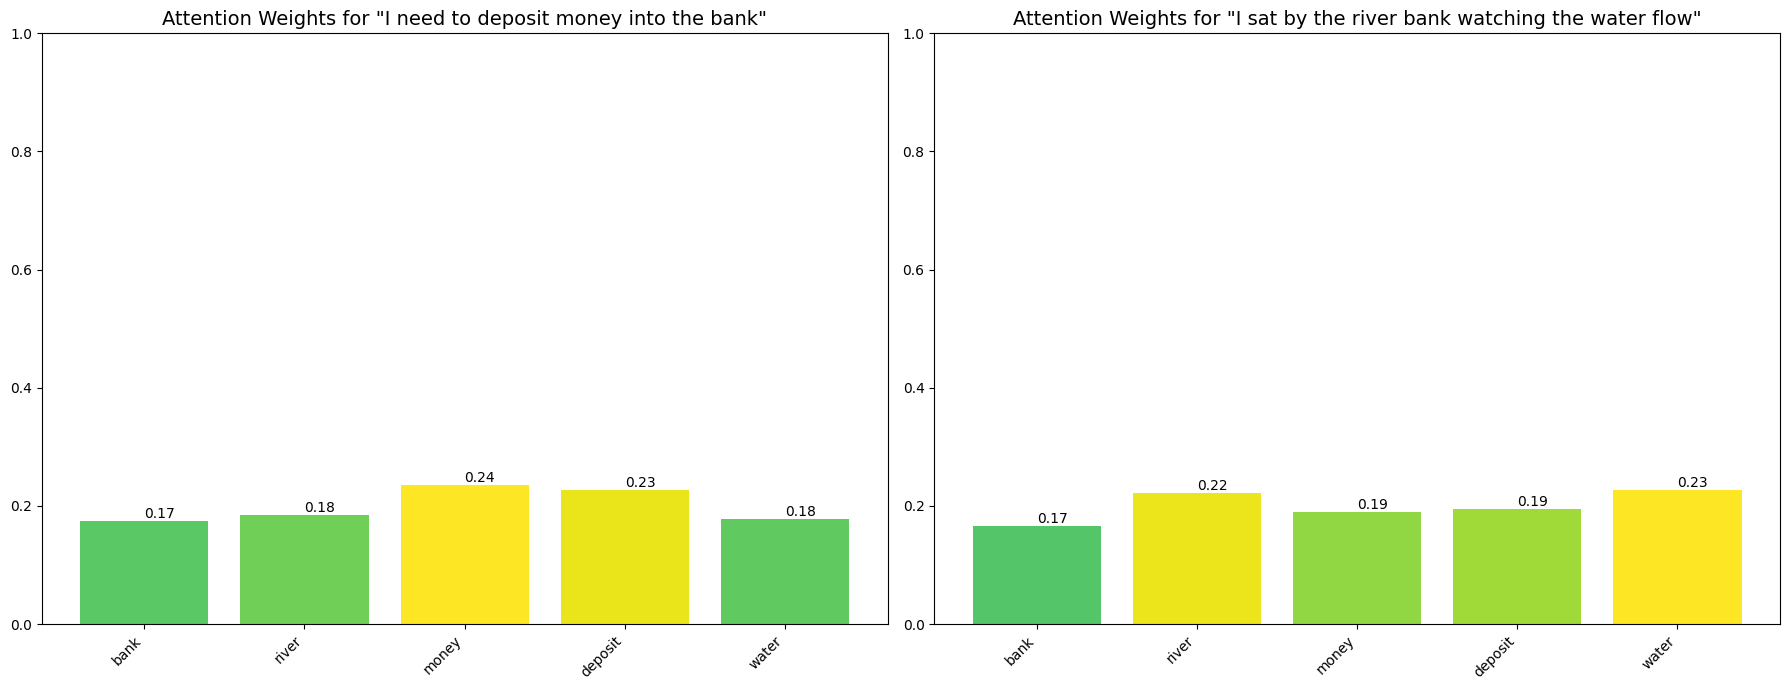

In [18]:
#@title A (very) Simplified Attention Example
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Define a set of embeddings
vocab = {
    'bank': torch.tensor([0.1, 0.3]),
    'river': torch.tensor([0.8, 0.2]),
    'money': torch.tensor([0.2, 0.9]),
    'deposit': torch.tensor([0.3, 0.8]),
    'water': torch.tensor([0.9, 0.1])
}

# Simple function to compute scaled dot-product attention
def attention(query, keys, values):
    """
    Compute scaled dot-product attention.

    query: Tensor representing the query
    keys: Tensor representing all keys
    values: Tensor representing all values
    """
    # Compute dot product of query and keys
    scores = torch.matmul(query, keys.transpose(0, 1)) / torch.sqrt(torch.tensor(keys.shape[1], dtype=torch.float32))
    # Apply softmax to get probabilities
    probs = F.softmax(scores, dim=-1)
    # Multiply probs by values to get weighted sum
    output = torch.matmul(probs, values)
    return output, probs

# Example usage with more words in different contexts
keys = torch.stack([vocab[word] for word in vocab])
values = keys  # In practice, keys and values can be different

# Context 1: "I need to deposit money into the bank"
query1 = (vocab['deposit'] + vocab['money'] + vocab['bank']) / 3
output1, probs1 = attention(query1, keys, values)

# Context 2: "I sat by the river bank watching the water flow"
query2 = (vocab['river'] + vocab['bank'] + vocab['water']) / 3
output2, probs2 = attention(query2, keys, values)

# Plotting attention weights
def plot_attention(probs, query_context, vocab_keys, plot_number):
    ax = plt.subplot(1, 2, plot_number)
    colors = plt.cm.viridis(probs.detach().numpy() / max(probs.detach().numpy()))  # Normalize and map to colormap
    bars = plt.bar(range(len(probs)), probs.detach().numpy(), color=colors)
    plt.title(f'Attention Weights for "{query_context}"', fontsize=14)
    plt.xticks(ticks=range(len(probs)), labels=vocab_keys, rotation=45, ha='right')
    plt.ylim(0, 1)  # Normalize y-axis to show probabilities clearly
    for bar, weight in zip(bars, probs):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{weight.item():.2f}', va='bottom', color='black', fontsize=10)  # Annotate weights

# Setup for plots
plt.figure(figsize=(18, 7))
plot_attention(probs1, 'I need to deposit money into the bank', list(vocab.keys()), 1)
plot_attention(probs2, 'I sat by the river bank watching the water flow', list(vocab.keys()), 2)
plt.tight_layout()
plt.show()



## A Note on Scale

Their great advantage and performance come from **scale**. In the context of deep learning, scale manifests in two primary dimensions: the size of the training datasets and the number of parameters within the models themselves.

- **Scaling up the dataset** allows the model to be exposed to a *broader range of examples*, *enhancing its ability to generalise from the training data to new, unseen data*. This is particularly crucial for tasks involving human language, which is infinitely varied and complex.

- **Increasing the number of parameters** allows for *more nuanced understanding and processing capabilities*. Each parameter can be thought of as a facet of the model's knowledge, with more parameters allowing for a richer, more detailed representation of the data.

Efficiency in training at scale is achieved through advanced optimisation algorithms, distributed computing, and specialised hardware like **GPUs** and **TPUs** that can perform large-scale mathematical computations more efficiently.

The benefits of scale in both training data and parameters are substantial. **Larger, more complex models trained on vast datasets can capture subtleties and nuances in the data that smaller models might miss**. This leads to models that are more accurate, more versatile, and capable of tackling a wider range of tasks.

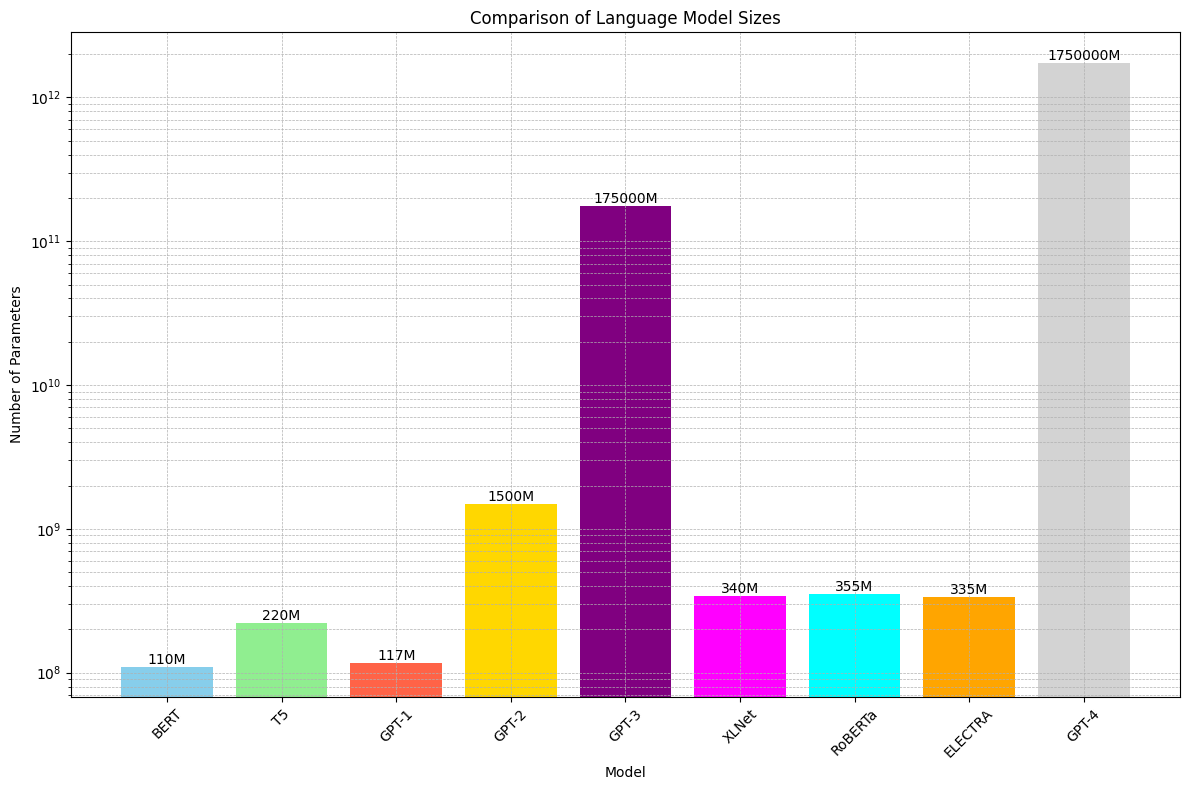

In [ ]:
#@title Language Models Size Comparison
models = ['BERT', 'T5', 'GPT-1', 'GPT-2', 'GPT-3', 'XLNet', 'RoBERTa', 'ELECTRA', 'GPT-4']
parameters = np.array([110e6, 220e6, 117e6, 1.5e9, 175e9, 340e6, 355e6, 335e6, 175e10])

plt.figure(figsize=(12, 8))

plt.bar(models, parameters, color=['skyblue', 'lightgreen', 'tomato', 'gold', 'purple', 'magenta', 'cyan', 'orange', 'lightgray'])

plt.xlabel('Model')
plt.ylabel('Number of Parameters')
plt.title('Comparison of Language Model Sizes')
plt.yscale('log')
plt.xticks(rotation=45)
plt.grid(True, which="both", ls="--", linewidth=0.5)

for i, v in enumerate(parameters):
    plt.text(i, v, f"{v/1e6:.0f}M", ha='center', va='bottom')

plt.tight_layout()
plt.show()


## A Note on Bias in LLMs

LLMs inherently carry biases that stem from their training data. **Since LLMs learn from vast swathes of internet text, they absorb and replicate the biases present in this data**. This can manifest in several ways:

- **Stereotyping**: LLMs can reinforce stereotypes, such as gender roles or racial biases, because they reflect the more frequent associations found in the training data. For example, associating nurses more often with women and doctors with men.

- **Language and Cultural Bias**: LLMs tend to perform better with well-represented languages and dialects (e.g., American English) than with those less represented in the training data, leading to disparities in model performance and utility across different linguistic and cultural groups.

- **Toxicity and Harmful Outputs**: These models can sometimes generate harmful or inappropriate content, particularly when prompted in certain ways or when interacting with sensitive topics, due to the unfiltered nature of much internet-based training material.

Addressing these biases is crucial for developing fairer and more ethical AI systems. **Efforts to mitigate biases **include careful **curation of training datasets**, **implementation of bias-checking mechanisms**, and **continual model monitoring and updating post-deployment**. These strategies aim to reduce the impact of biased data on model outputs and ensure more equitable outcomes for all users.

❗**these strategies are NOT AVAILABLE for social science researchers** (at least those of us who do not develop LLMs ourselves). We need to be very mindful of these biases and choose carefully which models we are using.

Consider the extracts from [Feng et al 2023](https://arxiv.org/pdf/2305.08283.pdf): "From Pretraining Data to Language Models to Downstream Tasks:
Tracking the Trails of Political Biases Leading to Unfair NLP Models"

<img src="https://cdn.githubraw.com/antndlcrx/oss_2024/main/images/pol_bias.png?raw=true:,  width=70" alt="My Image" width=700>

<img src="https://cdn.githubraw.com/antndlcrx/oss_2024/main/images/pol_bias_2.png?raw=true:,  width=70" alt="My Image" width=700>

# 🤗Huggingface

[🤗Hugging Face](https://huggingface.co/) is a platform for collaboration for the members of machine learning and artificial intelligence community and beyond. It is a community driven project, where anyone can contribute (including a future you!).

It has a great, nietly organised collection of:
- [models](https://huggingface.co/models)
- [datasets](https://huggingface.co/datasets)
- [guides, demos, use cases on most ML/AI tasks](https://huggingface.co/tasks)
- [research papers](https://huggingface.co/papers)
- [evaluation metrics](https://huggingface.co/metrics)

And more!

If you will end up using language models, image models, or anything in between, 🤗Huggingface fill be your best friend and most helpful assistant.

🤗Huggingface further develop and update a very powerful [transformers library](https://github.com/huggingface/transformers) which allows to access and use language models, often with minimum code.




# Fun with Pre-Trained LLM

The code below is based on (and, in difficult places, entirerly taken from) the workshop on prompts and instructions designed by **Ilya Boytsov** for the [Oxford LLMs summer school](https://github.com/antndlcrx/oxford-llms-workshop/tree/main). We extend to him our warmest gratitude 🤗



## Set Up (Might take up to 5 minutes)

We will be using the [Llama-2-7b](https://huggingface.co/NousResearch/Llama-2-7b-hf) model for this demonstration. The model is developed by Meta and is provided by [🤗Hugging Face](https://huggingface.co/) transformers library.


In [10]:
# takes about 1 min to run
!pip install -q accelerate==0.21.0 transformers==4.31.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 33.9 MB/s eta 0:00:00


In [11]:
from transformers import (
    AutoTokenizer,
    AutoModelForCausalLM,
    PreTrainedModel,
    PreTrainedTokenizer,
    PreTrainedTokenizerFast,
)
import torch
import pandas as pd

In [13]:
model_name = "NousResearch/Llama-2-7b-chat-hf"

tokenizer = AutoTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



tokenizer_config.json:   0%|          | 0.00/746 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/21.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/435 [00:00<?, ?B/s]

In [14]:
# takes about 3 min to run
model = AutoModelForCausalLM.from_pretrained(
    model_name, torch_dtype=torch.float16, trust_remote_code=True, device_map="auto"
)

config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/179 [00:00<?, ?B/s]

Let us stop here and review what has just happened:

- `AutoModelForCausalLM`: This is a class from the Hugging Face Transformers library designed to automatically select the appropriate *model class* for causal language modeling based on the `model_name` given. **Causal language modeling is a type of model that predicts the probability distribution of a token given the tokens that precede it**.

- `AutoTokenizer`: This is a *class* within the Hugging Face Transformers library that automatically detects and loads the appropriate tokenizer based on the given model_name. **Tokenizers** are responsible for converting raw text into a format that can be understood by the model, typically transforming text into a sequence of integers where each integer represents a specific token (e.g., a word or part of a word) in the model's vocabulary.

- `from_pretrained`: This *method* loads a model that has been pre-trained on a dataset. Pre-trained models are trained on large corpora of data and can be fine-tuned for specific tasks, saving significant resources and time.

    This method is used to instantiate the tokenizer with the pre-trained settings associated with model_name. The tokenizer configuration and vocabulary are directly loaded from the pre-trained model's repository. **This ensures that the tokenization aligns with the model's training, which is crucial for the model to perform accurately.**

- `model_name`: This variable should contain the identifier of the pre-trained model you want to load. Hugging Face hosts a wide variety of pre-trained models for different tasks and languages, identified by their names (e.g., "gpt-2", "bert-base-uncased").

- `torch_dtype=torch.float16`: This sets the data type for the model's tensors to float16, also known as half-precision floating-point format. **Using float16 can significantly reduce memory usage and increase computational speed**, which is particularly beneficial when using GPUs for model inference or training. However, it may also lead to reduced numerical precision.

- `trust_remote_code=True`: This option, when set to True, allows the execution of custom code from the remote repository associated with the pre-trained model. This is necessary for models that include custom layers or functions not included in the Transformers library. **However, enabling this option can pose a security risk if you're loading models from untrusted sources.**

- `device_map="auto"`: This instructs the library to automatically place the model's layers on the available devices (e.g., CPUs, GPUs) in the most efficient manner. For instance, if you have multiple GPUs, the library will distribute the model's layers across these GPUs to optimize parallel computation. This automatic device mapping helps in efficiently utilizing hardware resources without manually specifying the device allocation.

## Let's Explore!

In [ ]:
# Code by: Ilya Boytsov for Oxford LLMs 2023

def generate_text(model: PreTrainedModel, prompt: str) -> None:
    """
    takes as input model and text sample, prints text completions
    """
    input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")

    out = model.generate(
        **input_ids, max_length=200
    )

    print(tokenizer.decode(out[0], skip_special_tokens=True))

- `input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")`: This line tokenizes the input `prompt` using a tokenizer associated with the pre-trained language model (`tokenizer`). The tokenizer converts the text into a sequence of numerical IDs that the model can understand. The `return_tensors="pt"` argument specifies that the tokenizer should return PyTorch tensors. `.to("cuda")` moves the tensors to the GPU memory (if available) for faster processing.

- `out = model.generate(**input_ids, max_length=200)`: This line generates text completions based on the provided prompt using the pre-trained language model (`model`). The `generate` method is called on the model, passing the tokenized input IDs (`input_ids`) as keyword arguments. The `max_length=200` argument specifies the maximum length of the generated text in terms of tokens.

- `print(tokenizer.decode(out[0], skip_special_tokens=True))`: This line decodes the generated output tensor (`out`) back into human-readable text using the tokenizer's `decode` method. The `skip_special_tokens=True` argument instructs the decoder to skip special tokens like padding tokens or tokens indicating the end of the sequence. The decoded text is then printed to the console.


In [ ]:
prompt = "Write a short fictional story about the pi creature."

generate_text(model, prompt)

Write a short fictional story about the pi creature.

The Pi Creature

The sun was setting over the small coastal town of Coveville, casting a warm orange glow over the bustling streets. The smell of freshly caught fish wafted through the air, mingling with the sound of laughter and chatter from the local tavern. It was a peaceful evening, one that many of the townspeople had been looking forward to all day.

But in the depths of the ocean, a different kind of peace was being disrupted. A creature unlike any other, known only as the Pi Creature, was stirring from its slumber. It was a being of pure mathematics, born from the infinite possibilities of the universe. Its body was a swirling mass of numbers and symbols, its eyes glowing with an otherworldly light.

As the Pi Creature rose to the surface


In [ ]:
# try your own!

prompt = "" # enter your prompt here

generate_text(model, prompt)

Try running these code multiple times witthout changing the input!

## A Note on Temperature

**Temperature** is a parameter used in the generation of text from language models that *controls the randomness of predictions* by scaling the logits before applying softmax.


**The softmax function** converts a vector of values (logits) into a probability distribution. Each component of the output vector is the probability of the corresponding category. The formula for the softmax of a vector $z$
is given by:

$$
\text{Softmax}(z_i) = \frac{e^{z_i}}{\sum_{j} e^{z_j}}
$$

In this equation, $z_i$ represents the $i$-th component of the input vector $z$, and the denominator is the sum of exponentials of all the elements in the vector $z$, which normalizes the output to be a probability distribution.


The softmax function adjusted for temperature $T$ is given by:

$$
\text{Softmax}_T(z_i) = \frac{e^{z_i / T}}{\sum_{j} e^{z_j / T}}
$$


This equation modifies the standard softmax by incorporating a temperature parameter $T$ that influences the sharpness of the probability distribution:

- **Low Temperature (<1.0): Lowers the randomness** , leading to more predictable and conservative text generation. It sharpens the distribution, causing the model to be more confident but less diverse in its choices. The model is more likely to repeat itself or generate common, safe text. Lower values of $T$ make the distribution sharper (more peaky), emphasizing the maximum values more heavily.
  
- **High Temperature (>1.0): Increases randomness** , leading to more varied and creative outputs. The softmax distribution is flattened, making less likely choices more probable. This can be useful for generating more diverse and interesting text but may reduce coherence and accuracy. Higher values of $T$ spread out the probability more evenly across different outcomes, making it flatter and less confident.

- **Temperature = 1.0: Represents a neutral setting where no scaling is applied to the logits**. The probabilities calculated from the logits are used as they are, representing the true likelihoods as modeled.

Adjusting the temperature allows for controlling how conservative or explorative the model's predictions are, making it a crucial parameter in applications like language generation where the balance between randomness and predictability can greatly affect the quality and usability of the output.

In [20]:
#@title Temperature Visualised
from ipywidgets import interact, FloatSlider
# import matplotlib.pyplot as plt
# import matplotlib.pyplot as plt
# import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def plot_logits(prompt, temperature=1.0):
    '''
    implements interactive scale for visualising logits change with temperature
    '''
    # Encode the prompt and move inputs to the same device as model
    inputs = tokenizer(prompt, return_tensors="pt").to(device)

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits

    # Get the last logits (for the last token), apply temperature scaling
    logits = logits[0, -1, :] / temperature
    probs = torch.nn.functional.softmax(logits, dim=-1)

    # Move the tensor to CPU and then convert to NumPy
    probs_np = probs.cpu().numpy()

    # Find the indices of the top 3 probabilities
    top_probs, top_indices = torch.topk(probs, 3)
    top_probs = top_probs.cpu().numpy()
    top_indices = top_indices.cpu().numpy()

    # Decode the top token IDs to tokens
    top_tokens = tokenizer.convert_ids_to_tokens(top_indices)

    plt.figure(figsize=(10, 5))
    plt.plot(probs_np)
    plt.title(f"Probability Distribution at Temperature = {temperature}")
    plt.xlabel('Token ID')
    plt.ylabel('Probability')
    plt.show()

    # Print top 3 tokens and their probabilities
    print("Top 3 Tokens and Probabilities:")
    for token, prob in zip(top_tokens, top_probs):
        print(f"{token}: {prob:.4f}")

# Create interactive sliders
interact(plot_logits,
         prompt="The quick brown fox jumps over the lazy dog",
         temperature=FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='Temperature'))


interactive(children=(Text(value='The quick brown fox jumps over the lazy dog', description='prompt'), FloatSl…

<function __main__.plot_logits(prompt, temperature=1.0)>

In [ ]:
# Code by: Ilya Boytsov for Oxford LLMs 2023

def generate_with_params(model: PreTrainedModel, prompt: str, gen_params: dict) -> None:
    """
    takes as input initialised model and tokenizer, a prompt and a custom congig with generation options.
    """
    model_inputs = tokenizer(prompt, return_tensors='pt').to('cuda')

    output = model.generate(
        **model_inputs,
        **gen_params
    )

    print("Output:\n" + 100 * '-')
    print(tokenizer.decode(output[0], skip_special_tokens=True))

In [ ]:
gen_params = {
    "do_sample": True,
    "temperature": 1,
    "max_new_tokens": 200,
}

`"do_sample": True` controls whether the model will use sampling to generate each subsequent token.

When set to True, it enables stochastic sampling. *This means that instead of deterministically picking the most likely next token, the model samples from the probability distribution of the next token, given the previous context*. This distribution is influenced by the logits from the model's output.

Sampling introduces randomness and variety in the generated text, which can help create more diverse and interesting outputs, especially in creative applications or when you want the model to explore less probable paths in its generations.

In [ ]:
prompt = "Write a short fictional story about the pi creature."

generate_with_params(model, prompt, gen_params)

Output:
----------------------------------------------------------------------------------------------------
Write a short fictional story about the pi creature.
Prompt: Write a short story that takes place in a small coastal town where a strange sea creature is sighted for the first time in years.

Title: The Pi Creature's Return

It had been years since the pi creature was last spotted off the coast of Seabury, a small coastal town nestled in the heart of the Pacific Ocean. The local fishermen had told stories of the bizarre sea creature for generations, but no one had seen any evidence of its existence. That is, until last week.

It was a crisp autumn morning when the local fishing boat, The Seabird, returned to shore with an unusual catch. The crew had caught something they couldn't identify, something that didn't look like any fish they had ever seen before. As they unloaded their catch, the villagers gathered around to get a glimpse of the mysterious sea creature.




## Real Life Research Example

<img src="https://cdn.githubraw.com/antndlcrx/oss_2024/main/images/pa_abstract.png?raw=true:,  width=100" alt="My Image" width=900>

We will work with data from the [article above](https://www.cambridge.org/core/journals/political-analysis/article/sentiment-is-not-stance-targetaware-opinion-classification-for-political-text-analysis/743A9DD62DF3F2F448E199BDD1C37C8D). It is about the US Women Marches during the Trump 2016-2020 presidency.

First, we load the data and do initial pre-processing.

In [ ]:
DATA_PATH = 'https://raw.githubusercontent.com/antndlcrx/oss_2024/main/data/WM_tweets_groundtruth.csv'

wm_data = pd.read_csv(DATA_PATH)

In [ ]:
wm_data['stance'] = wm_data['stance'].map({1: 'support', 0: 'oppose'})
wm_data['sentiment'] = wm_data['sentiment'].map({1.0: 'positive', 0.0: 'negative'})
wm_data['text'] = wm_data['text'].str.replace(r'http\S+|www.\S+', '', case=False, regex=True) # remove urls

print(wm_data.shape)

wm_data.head(4)

(19612, 5)


,text,stance,sentiment,balanced_train,vader_scores
0,YES! I'm still with her and always will be.,NaN,NaN,0.0,0.5754
1,Pics or it didn't happen.,NaN,NaN,0.0,0.0000
2,I love this nasty woman. @MaribethMonroe #wome...,NaN,NaN,1.0,-0.0129
3,RT @YiawayYeh: Marching for love. Nashville #...,NaN,NaN,1.0,0.6369


Next, we use the functions created above to try to predict sentiment and stance without doing any tweaks to the model or providing it with training examples. This is called "zero-shot" prediction.

In [ ]:
train_data = [text for text in wm_data['text']]

In [ ]:
def generate_sentiment(text: str) -> None:
    """
    takes an input text, and outputs a sentiment prediction
    """
    task_prompt = "What is the sentiment of the following text: " + text
    generate_text(model, task_prompt)

def generate_stance(text: str) -> None:
    """
    takes an input text, and outputs a stance prediction towards women's march
    """
    task_prompt = "Does the author of the following text support or oppose women's march: " + text
    generate_text(model, task_prompt)

In [ ]:
generate_sentiment(train_data[0])

What is the sentiment of the following text: YES! I'm still with her and always will be. 

Please select one of the following sentiment options:

1. Positive
2. Negative
3. Neutral


In [ ]:
generate_stance(train_data[0])

Does the author of the following text support or oppose women's march: YES! I'm still with her and always will be. 

My answer is: Oppose

Reasoning: The author of the text states "I'm still with her and always will be," which suggests that they are in support of the women's march and the movement it represents.


This is not great..

CAUTION!: Do not let an LLM fool you!

<img src="https://cdn.githubraw.com/antndlcrx/oss_2024/main/images/gpt_interprets.png?raw=true:,  width=100" alt="My Image" width=500>






In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#@title Make Proper Datasets
wm_data_sampled = wm_data.sample(n=1000, random_state=42) # for the sake of running the code fast
train_data, val_data = train_test_split(wm_data_sampled, test_size=0.2, random_state=42)

In [ ]:
print(train_data.shape,
      val_data.shape)

(800, 5) (200, 5)


In [ ]:
#@title Adjust generating functions
def generate_text(model: PreTrainedModel, prompt: str) -> None:
    """
    takes as input model and text sample, prints text completions
    """
    input_ids = tokenizer(prompt, return_tensors="pt").to("cuda")
    prompt_length = len(tokenizer(prompt)['input_ids'])

    out = model.generate(
        **input_ids,
        max_length=prompt_length + 2 # adjust to generate a single word completion
    )

    result = tokenizer.decode(out[0], skip_special_tokens=True)
    return result

# Code by: Ilya Boytsov for Oxford LLMs 2023

def generate_with_params(model: PreTrainedModel, prompt: str, gen_params: dict) -> None:
    """
    takes as input initialised model and tokenizer, a prompt and a custom congig with generation options.
    """
    input_ids = tokenizer(prompt, return_tensors='pt').to('cuda')
    prompt_length = len(tokenizer(prompt)['input_ids'])

    output = model.generate(
        **input_ids,
        **gen_params,
        max_length=prompt_length + 2

    )

    result = tokenizer.decode(out[0], skip_special_tokens=True)
    return result

In [ ]:
# Code by: Ilya Boytsov for Oxford LLMs 2023 (adopted for OSS 2024)

def make_instruction(sample_text: str, sample_label: str, task: str) -> str:
    """
    Wraps input text and its label into instruction prompt based on the task
    """
    if task == 'stance':
        return f"Does the author of the following tweet support or oppose women's march: '{sample_text}'? {sample_label}\n"
    elif task == 'sentiment':
        return f"What is the sentiment of the following tweet: '{sample_text}'? {sample_label}\n"
    else:
        raise ValueError("Invalid task. Task must be either 'stance' or 'sentiment'.")


def make_few_shot_prompt(
    examples_data: pd.DataFrame,
    example_to_predict: str,
    task: str,
    n_shots: int = 1
) -> str:
    """
    Takes as input data frame with 'training' examples and a single sample to predict.
    Picks up the set task [sentiment, stance] as a label
    Takes several samples from data and add them to a prompt as few shot examples for the model.
    Model uses these few shot examples to make a prediction.
    """
    few_shot_prompt = ""  # create empty string for our final prompt
    examples_data = examples_data.sample(
        n=n_shots, random_state=42
    )  # take random n_shots samples from our examples data
    for _, row in examples_data.iterrows():  # iterate over each example
        text, label = row["text"], row[task]  # extract text and corresponding label based on the specified task
        few_shot_prompt += make_instruction(
            text, label, task
        )

    if task == 'stance':
        few_shot_prompt += f'Does the author of the following tweet support or oppose women\'s march: "{example_to_predict}"?'
    elif task == 'sentiment':
        few_shot_prompt += f'What is the sentiment of the following tweet: "{example_to_predict}"?'
    else:
        raise ValueError("Invalid task. Task must be either 'stance' or 'sentiment'.")

    return few_shot_prompt

In [ ]:
one_shot_prompt = make_few_shot_prompt(train_data, val_data['text'].iloc[0], 'stance', 3)
print(one_shot_prompt)

Does the author of the following tweet support or oppose women's march: 'My family had to watch our little grandson fight for 42 hrs after birth but he never made it, you make me sick #WomensMarch '? oppose
Does the author of the following tweet support or oppose women's march: 'Ooooh 😳 @realDonaldTrump / @POTUS done pissed off Marge, too! #WomensMarch '? support
Does the author of the following tweet support or oppose women's march: 'We made history at #womensmarch. Now it’s time to make our voices heard. First up: send a postcard to your Senators '? support
Does the author of the following tweet support or oppose women's march: "RT @Sabsterz_: I am in tears "?


In [ ]:
print(generate_text(model, one_shot_prompt))

Does the author of the following tweet support or oppose women's march: 'My family had to watch our little grandson fight for 42 hrs after birth but he never made it, you make me sick #WomensMarch '? oppose
Does the author of the following tweet support or oppose women's march: 'Ooooh 😳 @realDonaldTrump / @POTUS done pissed off Marge, too! #WomensMarch '? support
Does the author of the following tweet support or oppose women's march: 'We made history at #womensmarch. Now it’s time to make our voices heard. First up: send a postcard to your Senators '? support
Does the author of the following tweet support or oppose women's march: "RT @Sabsterz_: I am in tears "? support



We now need to extract the predicted category from the generated output.

In [21]:
def get_final_prediction(
        model: PreTrainedModel,
        examples_data: pd.DataFrame,
        example: str,
        task: str,
        n_shots: int = 1
) -> str:
    """
    Extracts the last word from the generated text.
    Args:
    - prompt_with_example (str): The output generated by the model promtped with instruction (decoded).
    - examples_data (pd.DataFrame): df with examples for few-shot learning
    - task (str): [stance, sentiment]

    Returns:
    - str: The last word from the generated text.
    """
    prompt_with_example = make_few_shot_prompt(train_data, example, task)
    generated_text = generate_text(model, prompt_with_example)
    # Strip any leading/trailing whitespace and split the text into words
    words = generated_text.strip().split()

    # Extract the last word, if there are any words
    if words:
        last_word = words[-1]
        return last_word
    else:
        return ""  # Return an empty string if there were no words

In [ ]:
get_final_prediction(model, train_data, val_data['text'].iloc[0], 'stance')

Finally, we can appy the function above to generate predictions on the validation set and assess the performance quality.



In [ ]:
# should take between 1min - 1.5min for 200 examples
stance_predictions = [
    get_final_prediction(model, train_data, example, 'stance', n_shots=3)
    for example in val_data['text']
]

sentiment_predictions = [
    get_final_prediction(model, train_data, example, 'sentiment', n_shots=3)
    for example in val_data['text']
]

In [ ]:
# Lets perform a sanity check and see if the model generated the desired categories
# set(stance_predictions)

from collections import Counter

item_counts = Counter(stance_predictions)
print(item_counts)

{'Does', 'oppose', 'support'}

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

stance_labels = val_data['stance']
sentiment_labels = val_data['sentiment']

def align_predictions_with_labels(predictions, true_labels, categories):
    """
    Aligns predictions with true labels, filtering out predictions that do not match expected categories.

    Args:
        predictions (list): List of raw predictions from the model.
        true_labels (list): Corresponding true labels.
        categories (set): Set of valid category strings.

    Returns:
        tuple: Two lists - the filtered predictions and the corresponding true labels.
    """
    filtered_predictions = []
    aligned_true_labels = []

    for pred, label in zip(predictions, true_labels):
        mapped_pred = map_prediction(pred, categories)
        if mapped_pred is not None:
            filtered_predictions.append(mapped_pred)
            aligned_true_labels.append(label)

    return filtered_predictions, aligned_true_labels


def map_prediction(pred, categories):
    pred = pred.lower()
    if pred in categories:
        return pred
    return None

stance_categories = {"oppose", "support"}
sentiment_categories = {'negative', 'positive'}

In [ ]:
# Aligning stance predictions with true labels
filtered_stance_predictions, aligned_stance_labels = align_predictions_with_labels(
    stance_predictions, stance_labels, stance_categories
)

# Aligning sentiment predictions with true labels
filtered_sentiment_predictions, aligned_sent_labels = align_predictions_with_labels(
    sentiment_predictions, sentiment_labels, sentiment_categories
)

print(len(filtered_stance_predictions),
      len(filtered_sentiment_predictions)
)

198 185


In [ ]:
#@title Get Metrics for Stance and Sentiment Predictions
from sklearn.metrics import precision_score, recall_score, f1_score

def calculate_metrics(labels, predictions, pos_label):
    """
    Calculate and return precision, recall, and F1 score rounded to two decimal places.
    """
    precision = round(precision_score(labels, predictions, average='binary', pos_label=pos_label), 2)
    recall = round(recall_score(labels, predictions, average='binary', pos_label=pos_label), 2)
    f1 = round(f1_score(labels, predictions, average='binary', pos_label=pos_label), 2)
    return precision, recall, f1

def print_metrics(category, precision, recall, f1):
    """
    Print the metrics in a formatted way.
    """
    print(f"{category} Metrics:")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}\n")

# Calculate metrics for stance
stance_precision, stance_recall, stance_f1 = calculate_metrics(
    aligned_stance_labels, filtered_stance_predictions, 'support'
)

# Calculate metrics for sentiment
sentiment_precision, sentiment_recall, sentiment_f1 = calculate_metrics(
    aligned_sent_labels, filtered_sentiment_predictions, 'positive'
)

# Print the metrics
print_metrics('Stance', stance_precision, stance_recall, stance_f1)
print_metrics('Sentiment', sentiment_precision, sentiment_recall, sentiment_f1)

Stance Metrics:
Precision: 0.97
Recall: 0.79
F1 Score: 0.87

Sentiment Metrics:
Precision: 0.86
Recall: 0.91
F1 Score: 0.89



How did our few-shot classification perform compared to the BERT fine-tuning approach the authors took in the paper?


What about their core claim that we should not approximate stance with setiment?  

In [ ]:
#@title Aligning stance predictions with true labels
def map_and_align(sent_predictions, true_labels):
    """
    Maps sentiment predictions to stance categories and aligns them with true stance labels.
    Args:
        sent_predictions (list): List of sentiment predictions.
        true_labels (list): List of corresponding true stance labels.
    Returns:
        tuple: Two lists - mapped stance predictions and the corresponding aligned true labels.
    """
    mapping = {'positive': 'support', 'negative': 'oppose'}
    filtered_predictions = []
    aligned_true_labels = []

    for pred, label in zip(sent_predictions, true_labels):
        stance = mapping.get(pred.lower(), None)  # Convert sentiment to stance
        if stance:  # Check if the mapping was successful
            filtered_predictions.append(stance)
            aligned_true_labels.append(label)

    return filtered_predictions, aligned_true_labels



# Map sentiment to stance and align
approximated_stance, new_aligned_stance_labels = map_and_align(sentiment_predictions, stance_labels)

print(len(approximated_stance))

# Calculate metrics for stance
aprx_stance_precision, aprx_stance_recall, aprx_stance_f1 = calculate_metrics(
    new_aligned_stance_labels, approximated_stance, 'support'
)

# Print the metrics
print_metrics('Stance aprx via Sentiment', aprx_stance_precision, aprx_stance_recall, aprx_stance_f1)

185
Stance aprx via Sentiment Metrics:
Precision: 0.96
Recall: 0.84
F1 Score: 0.9



## Further Resources

- [Visual introduction to Transformers by 3Blue1Brown](https://www.youtube.com/watch?v=wjZofJX0v4M&list=WL&index=3)
- [NLP Course For You by Lena Voita](https://lena-voita.github.io/nlp_course.html)
    - [Language Modelling](https://lena-voita.github.io/nlp_course.html#preview_lang_models)
    - [Seq2Seq and Attention](https://lena-voita.github.io/nlp_course/seq2seq_and_attention.html)
    - [Introduction to Transfer Learning](https://lena-voita.github.io/nlp_course/transfer_learning.html)
    - And More!
- [Oxford LLMs Course](https://github.com/antndlcrx/oxford-llms-workshop/tree/main)
    - Evolutionary Journy in NLP
    - Bias in LLMs and Interpretability
    - Prompt Engineering, ChatGPT, RLHF
    - Topic Modelling with Transformers
    - Fine-Tuning Pretrained Transformers
    - Parameter Efficient Fine-Tuning
    - Prompts and Instructions with Llama 2
    - And More!
- [Neural Networks: from Zero to Hero](https://www.youtube.com/watch?v=VMj-3S1tku0&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ)